In [1]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_ckpt = "Johannesemme/kategoriBERT"

In [3]:
classifier = pipeline("text-classification", model=model_ckpt)

In [4]:
text_example = "Jeg glæder mig til at se det danske landshold spille VM i Qatar"

In [5]:
# Top score
preds = classifier(text_example)
preds

[{'label': 'Sport', 'score': 0.9021792411804199}]

In [6]:
# All scores
preds = classifier(text_example, return_all_scores=True)


/opt/conda/lib/python3.7/site-packages/transformers/pipelines/text_classification.py:90: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  "`return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality", UserWarning


In [7]:
label_names = [i["label"] for i in preds[0]]
label_names

['Uddannelse',
 'Samfund',
 'Videnskab',
 'Natur',
 'Teknologi',
 'Kultur',
 'Historie',
 'Sundhed',
 'Geografi',
 'Økonomi',
 'Sport',
 'Religion',
 'Politik',
 'Erhvervsliv']

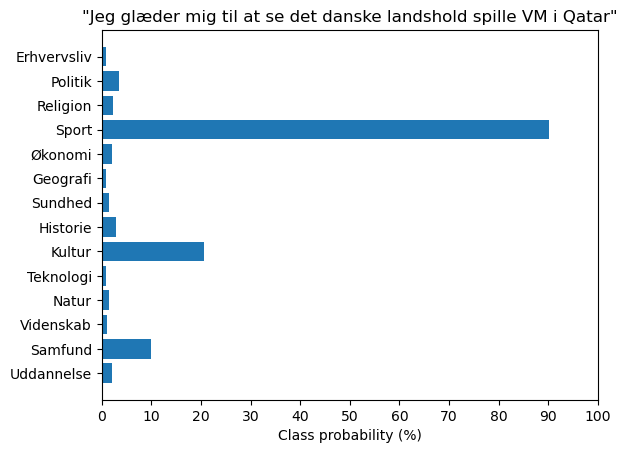

In [8]:
preds_df = pd.DataFrame(preds[0])
plt.barh(label_names, 100*preds_df["score"], color="C0")
plt.title(f'"{text_example}"')
plt.xlabel("Class probability (%)")
plt.xticks(np.arange(0,101,10))
plt.show()